In [30]:
import pandas as pd

# Inlezen van het bestand
dfreal = pd.read_csv("beluchting_output_dynamicDOsensor.txt", 
                     delim_whitespace=True,
                     comment='#',
                     header=None)

# Kolomnamen toevoegen
dfreal.columns = ['t', 'DO_4', 'KLa_4', 'DO_5', 'KLa_5', 'S_basin4', 'S_basin5']

# Starttijd definiëren
start_time = pd.Timestamp("2023-10-25 00:00")

# Zet 't' om naar tijdstippen
dfreal['Datetime'] = start_time + pd.to_timedelta(dfreal['t'], unit='D')

# Filter op einddatum
end_time = pd.Timestamp("2025-02-20 23:59")
dfreal = dfreal[dfreal['Datetime'] <= end_time]

# (Optioneel) Verplaats kolom naar voren
dfreal = dfreal[['Datetime'] + dfreal.columns[:-1].tolist()]

# Controle
print(dfreal[95:150])

                         Datetime         t      DO_4      KLa_4      DO_5  \
95  2023-10-25 22:48:07.175520000  0.950083  2.024835  150.77815  0.975753   
96  2023-10-25 23:04:30.543168000  0.961465  2.039581  151.45868  1.279003   
97  2023-10-25 23:16:53.439744000  0.970063  2.040716  150.58373  1.297575   
98  2023-10-25 23:33:17.223840000  0.981449  2.031735  150.44601  1.250884   
99  2023-10-25 23:47:30.339168000  0.991323  2.046016  149.93331  0.901446   
100 2023-10-26 00:01:51.101760000  1.001286  2.031321  150.41188  0.774047   
101 2023-10-26 00:15:59.074560000  1.011100  2.019229  150.34526  0.889749   
102 2023-10-26 00:31:16.158720000  1.021715  2.007138  150.28499  1.051692   
103 2023-10-26 00:43:12.362880000  1.030004  1.996406  150.05713  1.071771   
104 2023-10-26 00:58:07.622400000  1.040366  2.026727  151.38520  0.675680   
105 2023-10-26 01:13:14.347200000  1.050860  2.036531  151.30939  0.944745   
106 2023-10-26 01:27:12.885120000  1.060566  2.019402  150.63221

/var/folders/9f/th88wdx51hg0ndwms7rmbwbm0000gn/T/ipykernel_2621/3076424589.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dfreal = pd.read_csv("beluchting_output_dynamicDOsensor.txt",


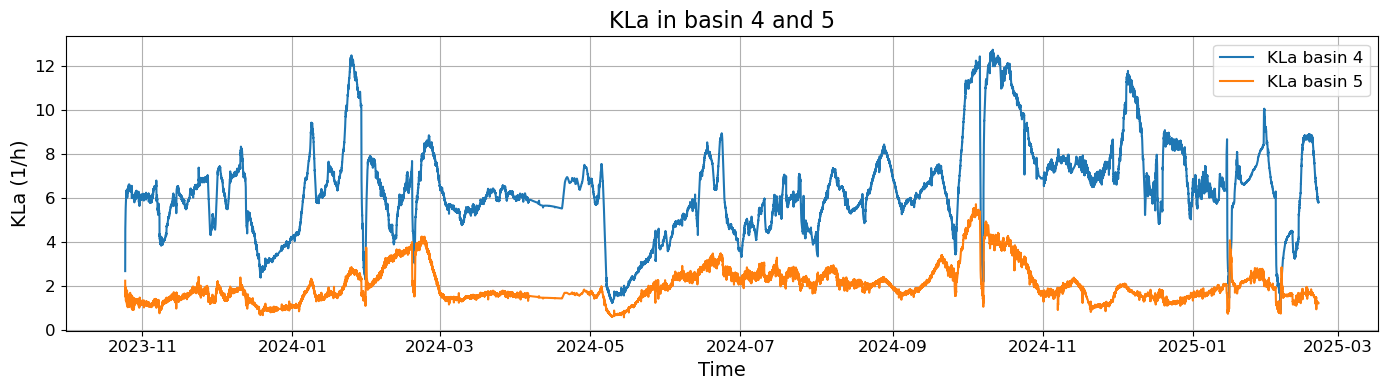

In [31]:
import matplotlib.pyplot as plt

dfreal['KLauur4'] = dfreal['KLa_4'] / 24
dfreal['KLauur5'] = dfreal['KLa_5'] / 24
dfreal['KLagemiddeldvolume']= (dfreal['KLauur4']*1080+dfreal['KLauur5']*1940) /(1080+1940)

plt.figure(figsize=(14, 4))  # Breder en iets platter

# Plot de KLa-waarden
plt.plot(dfreal['Datetime'], dfreal['KLauur4'], label='KLa basin 4')
plt.plot(dfreal['Datetime'], dfreal['KLauur5'], label='KLa basin 5')

# Aslabels
plt.xlabel("Time", fontsize=14)
plt.ylabel("KLa (1/h)", fontsize=14)

# Titel
plt.title("KLa in basin 4 and 5", fontsize=16)

# Ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Legenda
plt.legend(fontsize=12)

# Grid en layout
plt.grid(True)
plt.tight_layout()

# Opslaan als PDF
plt.savefig("kla_basin4_5_over_timeDOsensor.pdf", format='pdf', bbox_inches='tight')
plt.show()

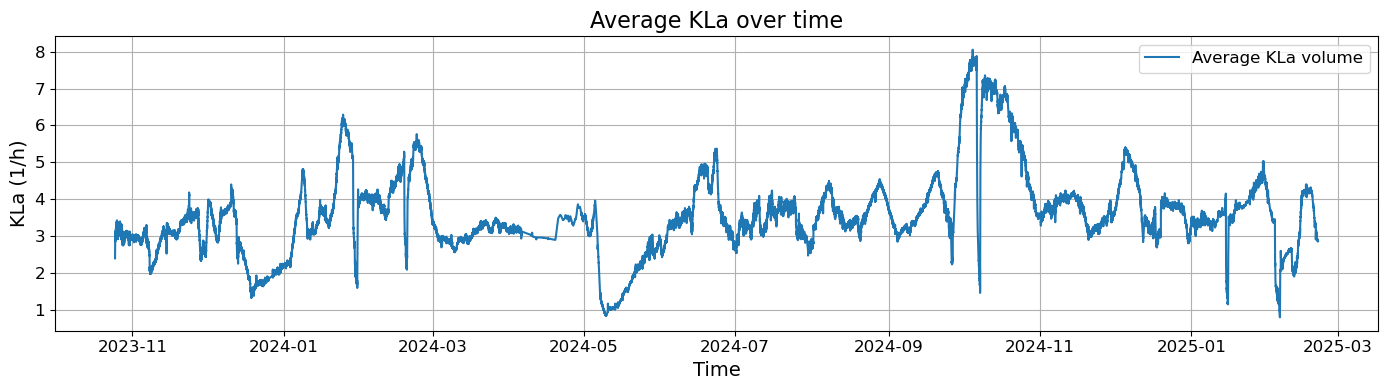

In [32]:
plt.figure(figsize=(14, 4))  # Breder en iets platter

# Lijnen plotten
plt.plot(dfreal['Datetime'], dfreal['KLagemiddeldvolume'], label='Average KLa volume')

# Aslabels
plt.xlabel("Time", fontsize=14)
plt.ylabel("KLa (1/h)", fontsize=14)

# Titel
plt.title("Average KLa over time", fontsize=16)

# Ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Legenda
plt.legend(fontsize=12)

# Grid en layout
plt.grid(True)
plt.tight_layout()

# Opslaan
plt.savefig("kla_average_overtime.pdf", format='pdf', bbox_inches='tight')
plt.show()


In [33]:
import pandas as pd

# Inlezen van bestand
kLas = pd.read_csv("kla_values_2tanksincludingCODssensor.csv")

# Zet 'Date' kolom naar datetime en voeg 12:00 toe
kLas['Date'] = pd.to_datetime(kLas['Date']).dt.date
kLas['Datetime'] = pd.to_datetime(kLas['Date']) + pd.Timedelta(hours=12)

# Referentietijd
start_time = pd.Timestamp("2023-10-25 00:00")

# Bereken verschil in dagen sinds starttijd + 12 uur (dus t=0.5 op 25/10 om 12:00)
kLas['Tijd'] = (kLas['Datetime'] - start_time).dt.total_seconds() / (24 * 3600)

# Controle
print(kLas[['Date', 'Datetime', 'Tijd']].head())

         Date            Datetime  Tijd
0  2023-10-26 2023-10-26 12:00:00   1.5
1  2023-10-30 2023-10-30 12:00:00   5.5
2  2023-11-02 2023-11-02 12:00:00   8.5
3  2023-11-06 2023-11-06 12:00:00  12.5
4  2023-11-09 2023-11-09 12:00:00  15.5


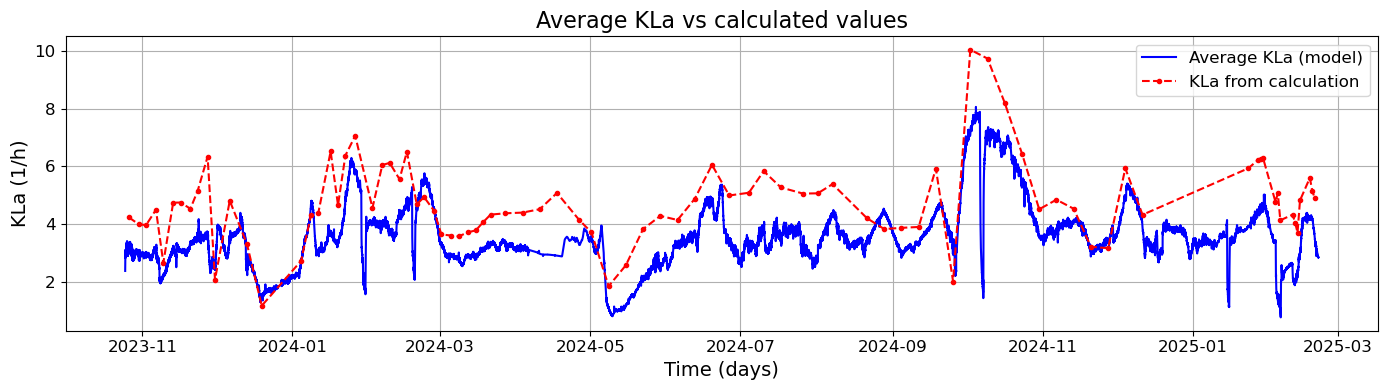

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 4))

# Simulatiewaarden als lijn
plt.plot(dfreal['Datetime'], dfreal['KLagemiddeldvolume'], label='Average KLa (model)', color='blue')

# Toegevoegde lijn op basis van labdata
plt.plot(kLas['Datetime'], kLas['kLa (1/h)'], label='KLa from calculation', color='red', linestyle='--', marker='o', markersize=3)

# Aslabels met grotere fontsize
plt.xlabel("Time (days)", fontsize=14)
plt.ylabel("KLa (1/h)", fontsize=14)

# Titel
plt.title("Average KLa vs calculated values", fontsize=16)

# Tickgroottes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Legenda met grotere letters
plt.legend(fontsize=12)

# Grid en layout
plt.grid(True)
plt.tight_layout()

# Opslaan als PDF
plt.savefig("kla_averagevscalculation.pdf", format='pdf', bbox_inches='tight')
plt.show()

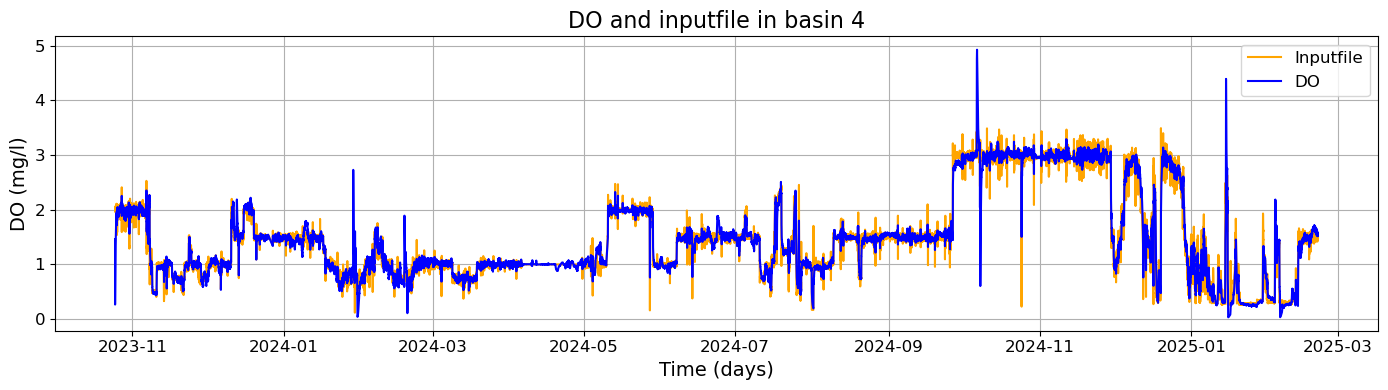

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 4))

# Plot DO en inputwaarde
plt.plot(dfreal['Datetime'], dfreal['S_basin4'], label='Inputfile', color='orange')
plt.plot(dfreal['Datetime'], dfreal['DO_4'], label='DO', color='blue')

# Grotere labels
plt.xlabel("Time (days)", fontsize=14)
plt.ylabel("DO (mg/l)", fontsize=14)
plt.title("DO and inputfile in basin 4", fontsize=16)

# Grotere ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Legenda
plt.legend(fontsize=12)

# Grid en layout
plt.grid(True)
plt.tight_layout()

# Opslaan als PDF
plt.savefig("kla_DOvsInputfile.pdf", format='pdf', bbox_inches='tight')
plt.show()



Vanaf hier worden de residuals berekend

In [36]:
import pandas as pd

# Laad airflowdata
qair4 = pd.read_csv("airflowrate_basin4.csv", parse_dates=["Time"])

# Haal juiste kolom
naam_kolom = qair4.columns[1]

# Zet Time als datetime index voor resampling
qair4 = qair4.set_index('Time')

# Lees doeldata
kLas = pd.read_csv("kla_values_2tanksincludingCODssensor.csv")
kLas['Date'] = pd.to_datetime(kLas['Date'])
doeldatums = pd.DataFrame({'Date': kLas['Date']})
doeldatums = doeldatums.set_index('Date')

# Weekgemiddelde airflow berekenen
qair4_weekly = qair4.resample('W').mean()

# Interpoleer naar doeldatums
qair4_weekly_interpol = qair4_weekly.reindex(qair4_weekly.index.union(doeldatums.index)).sort_index()
qair4_weekly_interpol = qair4_weekly_interpol.interpolate(method='time')
qair4_weekly_interpol = qair4_weekly_interpol.loc[doeldatums.index]
qair4_weekly_interpol = qair4_weekly_interpol.reset_index()

# Controle
print(qair4_weekly_interpol.head())
print(qair4_weekly_interpol.shape)


        Date  airflow_basin4
0 2023-10-26      475.430984
1 2023-10-30      418.965879
2 2023-11-02      415.942164
3 2023-11-06      387.570995
4 2023-11-09      311.528633
(87, 2)


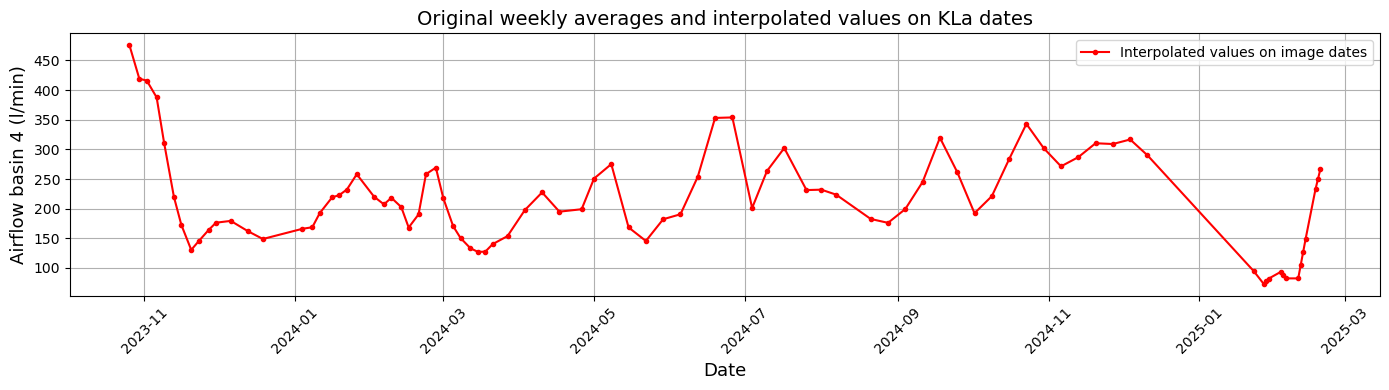

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 4))

# Plot de geïnterpoleerde waarden (enkel op kLas datums)
plt.plot(qair4_weekly_interpol['Date'], qair4_weekly_interpol[naam_kolom],
         marker='o', linestyle='-', color='red', label='Interpolated values on image dates', markersize=3)

plt.xlabel("Date", fontsize=13)
plt.ylabel("Airflow basin 4 (l/min)", fontsize=13)
plt.title("Original weekly averages and interpolated values on KLa dates", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


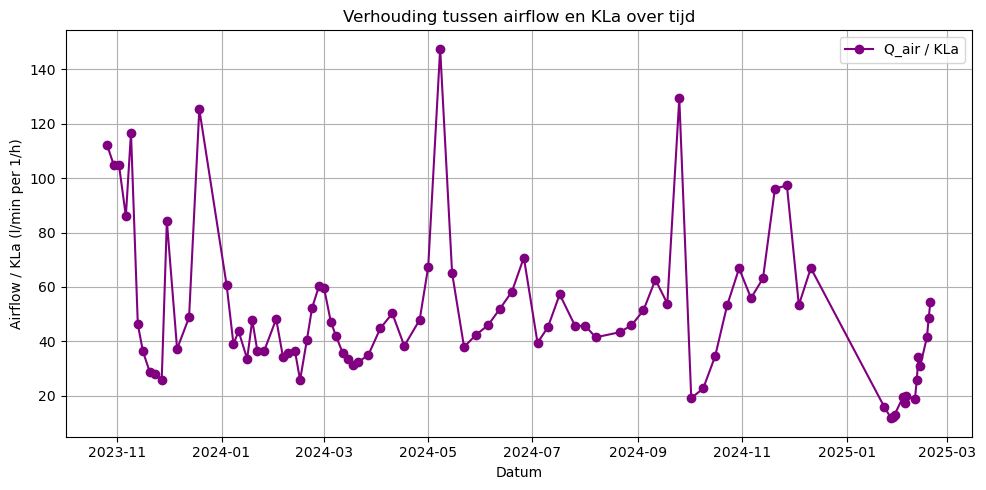

In [38]:
# Zet index gelijk om correcte alignment te verzekeren
kLas = kLas.reset_index(drop=True)
weekgemiddelden_interp = qair4_weekly_interpol.reset_index(drop=True)

# Voeg airflowkolom toe zonder merge
kLas[naam_kolom] = weekgemiddelden_interp[naam_kolom]

assert all(kLas['Date'] == weekgemiddelden_interp['Date']), "Datums komen niet overeen!"

kLas['ratioQairKLa'] = kLas[naam_kolom] / kLas['kLa (1/h)']

# Plot
plt.figure(figsize=(10, 5))
plt.plot(kLas['Date'], kLas['ratioQairKLa'], marker='o', linestyle='-', color='purple', label='Q_air / KLa')

plt.xlabel("Datum")
plt.ylabel("Airflow / KLa (l/min per 1/h)")
plt.title("Verhouding tussen airflow en KLa over tijd")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

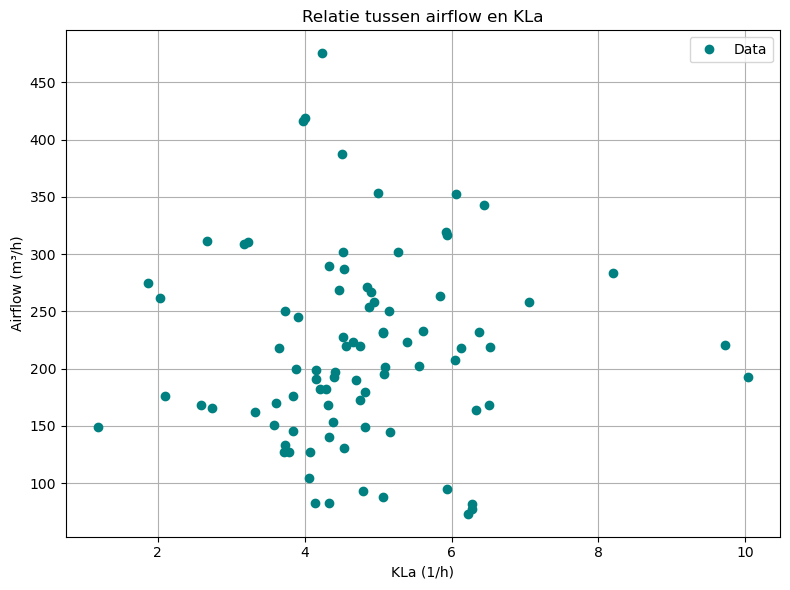

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# x = KLa, y = airflow
x = kLas['kLa (1/h)']
y = kLas[naam_kolom]

# Voor de lijn: gesorteerde x en bijhorende y
x_sorted = np.sort(x)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', color='teal', label='Data')

plt.xlabel("KLa (1/h)")
plt.ylabel("Airflow (m³/h)")
plt.title("Relatie tussen airflow en KLa")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


/var/folders/9f/th88wdx51hg0ndwms7rmbwbm0000gn/T/ipykernel_2621/587678710.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


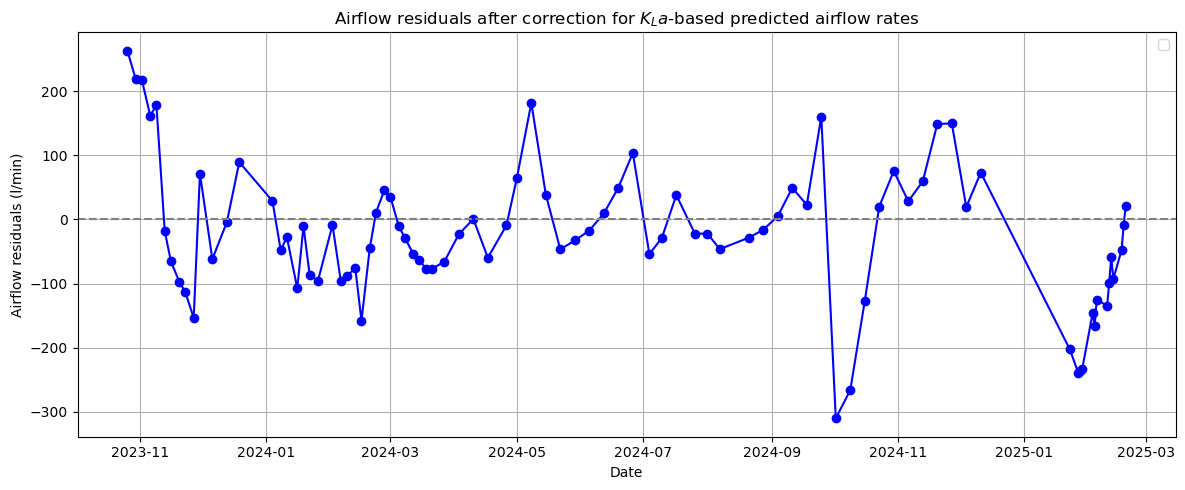

50.08131505715693


In [39]:
gemiddelde_ratio = kLas['ratioQairKLa'].mean()
kLas['airflow_expected'] = gemiddelde_ratio * kLas['kLa (1/h)']
kLas['airflow_residueel'] = kLas[naam_kolom] - kLas['airflow_expected']

plt.figure(figsize=(12, 5))
plt.plot(kLas['Date'], kLas['airflow_residueel'], marker='o', linestyle='-', color='blue')

plt.axhline(0, linestyle='--', color='gray')
plt.xlabel("Date")
plt.ylabel("Airflow residuals (l/min)")
plt.title("Airflow residuals after correction for $K_La$-based predicted airflow rates")
plt.grid(True)
plt.legend()
# Opslaan als PDF
plt.savefig("airflowresiduals.pdf", format='pdf', bbox_inches='tight')
plt.tight_layout()
plt.show()

print(gemiddelde_ratio)

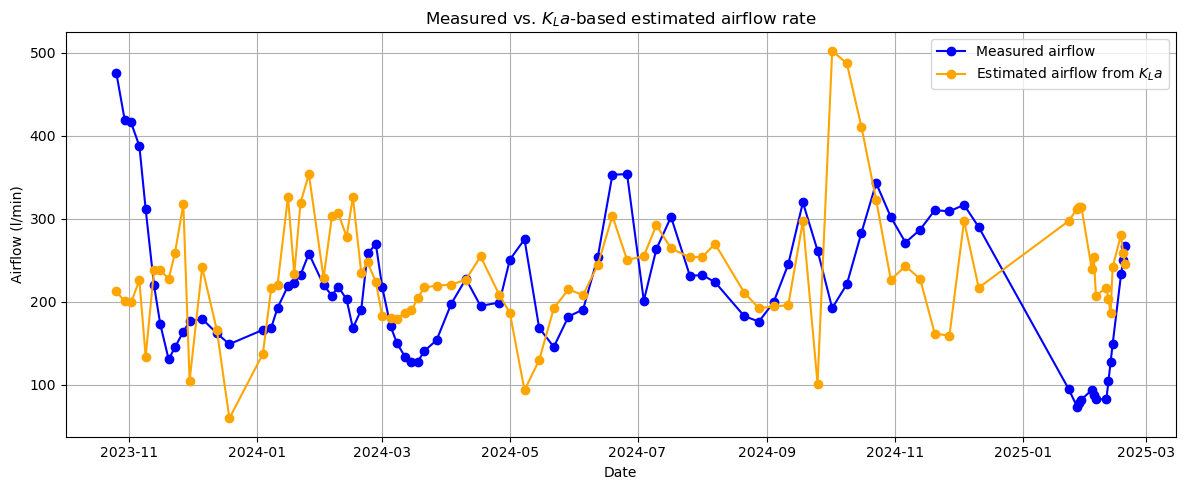

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot gemeten airflow
plt.plot(kLas['Date'], kLas[naam_kolom], marker='o', linestyle='-', color='blue', label='Measured airflow')

# Plot verwachte airflow op basis van KLa
plt.plot(kLas['Date'], kLas['airflow_expected'], marker='o', linestyle='-', color='orange', label='Estimated airflow from $K_La$')

# Opmaak
plt.xlabel("Date")
plt.ylabel("Airflow (l/min)")
plt.title("Measured vs. $K_La$-based estimated airflow rate")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Opslaan
plt.savefig("measured_vs_estimated_airflow.pdf", format='pdf', bbox_inches='tight')
plt.show()

In [28]:
# Selecteer kolommen die je wil bewaren
output = kLas[['Date', 'airflow_residueel']]

# Opslaan als CSV
output.to_csv("airflow_residueel_per_dag.csv", index=False)

print(output.shape)


(87, 2)


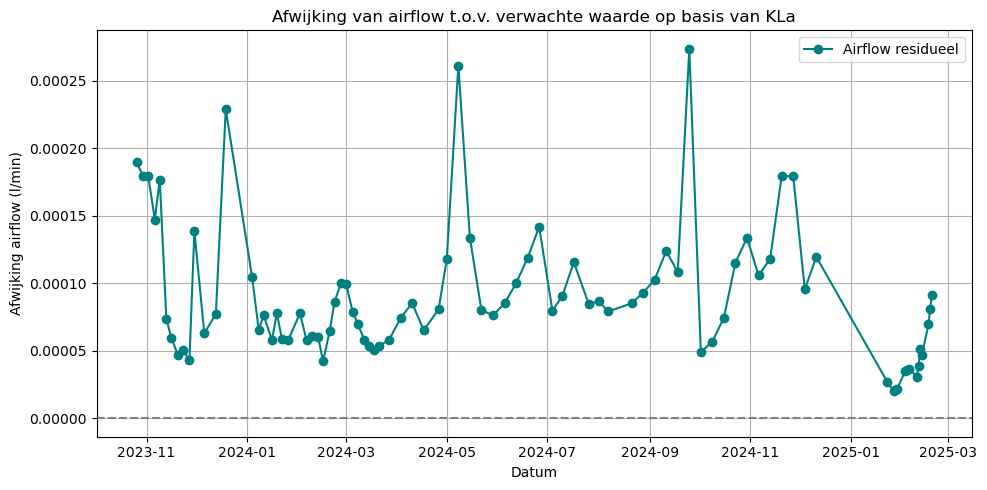

In [29]:
merged_df = pd.read_csv("merged_df_2tanksincludingCODssensor.csv")
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

kLas['airflowoverdemand'] = kLas[naam_kolom]/merged_df['R0']

plt.figure(figsize=(10, 5))
plt.plot(kLas['Date'], kLas['airflowoverdemand'], marker='o', linestyle='-', color='teal', label='Airflow residueel')

plt.axhline(0, linestyle='--', color='gray')
plt.xlabel("Datum")
plt.ylabel("Afwijking airflow (l/min)")
plt.title("Afwijking van airflow t.o.v. verwachte waarde op basis van KLa")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()